In [1]:
import pandas as pd
import numpy as np 
from pathlib import Path
import os
import matplotlib.pyplot as plt

/**STEP - 1 CLEANING WEATHER DATA**/

In [32]:
#Load weather csv file
weather_filepath = Path("../Resources/chicago_weather_data_2020_2023.csv")
weather_df = pd.read_csv(weather_filepath)



In [33]:
#Remove unwanted columns

weather_df.drop(columns=["snow_3h","sea_level","grnd_level","rain_3h","city_name","lat","lon","wind_gust","rain_1h","rain_3h","snow_1h","snow_3h"],inplace=True)

weather_df.head()



,dt,dt_iso,timezone,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1577836800,2020-01-01 00:00:00 +0000 UTC,-21600,-2.08,10000.0,-5.63,-9.08,-2.31,-1.56,1010,74,12.9,260,95,804,Clouds,overcast clouds,04n
1,1577840400,2020-01-01 01:00:00 +0000 UTC,-21600,-1.99,10000.0,-5.23,-8.99,-2.23,-1.54,1010,76,10.3,270,75,803,Clouds,broken clouds,04n
2,1577844000,2020-01-01 02:00:00 +0000 UTC,-21600,-1.87,10000.0,-4.96,-8.87,-2.23,-1.36,1011,77,9.8,270,100,804,Clouds,overcast clouds,04n
3,1577847600,2020-01-01 03:00:00 +0000 UTC,-21600,-1.90,10000.0,-4.55,-8.90,-2.79,-1.14,1011,80,9.3,270,40,802,Clouds,scattered clouds,03n
4,1577851200,2020-01-01 04:00:00 +0000 UTC,-21600,-2.18,10000.0,-4.67,-9.18,-2.78,-1.36,1011,81,8.8,260,75,803,Clouds,broken clouds,04n


CONVERTING UTC FORMAT TIME TO LOCAL TIME 

In [26]:
# Remove ' UTC' and parse datetime

weather_df['dt_iso_UTC_removed'] = weather_df['dt_iso'].str.replace(' UTC', '', regex=False)
weather_df['datetime'] = pd.to_datetime(weather_df['dt_iso_UTC_removed'])

# Adjust for timezone offset to get local time

weather_df['local_datetime'] = weather_df['datetime'] + pd.to_timedelta(weather_df['timezone'], unit='s')

weather_df.head()

,dt,dt_iso,timezone,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,...,wind_speed,wind_deg,clouds_all,weather_id,weather_main,weather_description,weather_icon,dt_iso_UTC_removed,datetime,local_datetime
0,1577836800,2020-01-01 00:00:00 +0000 UTC,-21600,-2.08,10000.0,-5.63,-9.08,-2.31,-1.56,1010,...,12.9,260,95,804,Clouds,overcast clouds,04n,2020-01-01 00:00:00 +0000,2020-01-01 00:00:00+00:00,2019-12-31 18:00:00+00:00
1,1577840400,2020-01-01 01:00:00 +0000 UTC,-21600,-1.99,10000.0,-5.23,-8.99,-2.23,-1.54,1010,...,10.3,270,75,803,Clouds,broken clouds,04n,2020-01-01 01:00:00 +0000,2020-01-01 01:00:00+00:00,2019-12-31 19:00:00+00:00
2,1577844000,2020-01-01 02:00:00 +0000 UTC,-21600,-1.87,10000.0,-4.96,-8.87,-2.23,-1.36,1011,...,9.8,270,100,804,Clouds,overcast clouds,04n,2020-01-01 02:00:00 +0000,2020-01-01 02:00:00+00:00,2019-12-31 20:00:00+00:00
3,1577847600,2020-01-01 03:00:00 +0000 UTC,-21600,-1.90,10000.0,-4.55,-8.90,-2.79,-1.14,1011,...,9.3,270,40,802,Clouds,scattered clouds,03n,2020-01-01 03:00:00 +0000,2020-01-01 03:00:00+00:00,2019-12-31 21:00:00+00:00
4,1577851200,2020-01-01 04:00:00 +0000 UTC,-21600,-2.18,10000.0,-4.67,-9.18,-2.78,-1.36,1011,...,8.8,260,75,803,Clouds,broken clouds,04n,2020-01-01 04:00:00 +0000,2020-01-01 04:00:00+00:00,2019-12-31 22:00:00+00:00


In [30]:

#Dropping any NaT(Not a time) value in local_datetime column
weather_df = weather_df.dropna(subset=["local_datetime"])

weather_df["date"]=weather_df["local_datetime"].dt.date
weather_df["time"]=weather_df["local_datetime"].dt.time

# Function to process datetime.time objects and compute rounded hours
def convert_and_round(time_obj):
    # Extract hours, minutes, and seconds
    hours = time_obj.hour
    minutes = time_obj.minute
    seconds = time_obj.second

    # Calculate total hours
    total_hours = hours + (minutes / 60) + (seconds / 3600)

    # Apply rounding logic
    return total_hours 

# Apply the function to the 'time' column
weather_df['hours'] = weather_df['time'].apply(convert_and_round)



 BIKE SHARE DATA

In [2]:
#Loading bike share data.
bike_share = Path("../Resources/data/202101-divvy-tripdata.csv")
bike_share_df = pd.read_csv(bike_share)
bike_share_df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [3]:

# Directory containing the CSV files
directory = "../Resources/data"

# List all CSV files in the directory
csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]

# Define the cleaning function to clean each bike share file
def clean_bike_share_data(bike_share_df):
    # Drop unwanted columns
    bike_share_df = bike_share_df.drop(columns=["end_station_name", "end_station_id", "end_lat", "end_lng", "ride_id"])
    
    # Convert 'started_at' and 'ended_at' to datetime
    bike_share_df[["started_at", "ended_at"]] = bike_share_df[["started_at", "ended_at"]].apply(pd.to_datetime, errors='coerce')
    
    # Drop rows with missing or NaT values in 'started_at' and 'ended_at'
    bike_share_df = bike_share_df.dropna(subset=["started_at", "ended_at"])
    
    # Extract 'date' and 'time' from 'started_at' and 'ended_at'
    bike_share_df["started_date"] = bike_share_df["started_at"].dt.date
    bike_share_df["started_time"] = bike_share_df["started_at"].dt.time
    bike_share_df["ended_date"] = bike_share_df["ended_at"].dt.date
    bike_share_df["ended_time"] = bike_share_df["ended_at"].dt.time
    
    # Convert time to hours and round if necessary
    def convert_time_and_round(time_data):
        hours = time_data.hour
        minutes = time_data.minute
        seconds = time_data.second
        total_hours = hours + (minutes / 60) + (seconds / 3600)
        return np.ceil(total_hours) if total_hours > 0.5 else hours
    
    # Apply conversion for time columns
    bike_share_df["started_time_in_hours"] = bike_share_df["started_time"].apply(convert_time_and_round)
    bike_share_df["ended_time_in_hours"] = bike_share_df["ended_time"].apply(convert_time_and_round)
    
    return bike_share_df

# Initialize an empty list to hold cleaned DataFrames
cleaned_dataframes = []

# Process each file
for file in csv_files:
    # Construct the full file path
    file_path = os.path.join(directory, file)
    
    # Load the CSV file
    df = pd.read_csv(file_path)
    
    # Clean the DataFrame
    cleaned_df = clean_bike_share_data(df)
    
    # Append the cleaned DataFrame to the list
    cleaned_dataframes.append(cleaned_df)

# Concatenate all cleaned DataFrames into a single DataFrame
combined_df = pd.concat(cleaned_dataframes, ignore_index=True)




In [10]:
combined_df.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,start_lat,start_lng,member_casual,started_date,started_time,ended_date,ended_time,started_time_in_hours,ended_time_in_hours
0,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,41.900341,-87.696743,member,2021-01-23,16:14:19,2021-01-23,16:24:44,17.0,17.0
1,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,41.900333,-87.696707,member,2021-01-27,18:43:08,2021-01-27,18:47:12,19.0,19.0
2,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,41.900313,-87.696643,member,2021-01-21,22:35:54,2021-01-21,22:37:14,23.0,23.0
3,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,41.900399,-87.696662,member,2021-01-07,13:31:13,2021-01-07,13:42:55,14.0,14.0
4,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,41.900326,-87.696697,casual,2021-01-23,02:24:02,2021-01-23,02:24:45,3.0,3.0


In [11]:
#merging data
merged_data = pd.merge(combined_df,weather_df, left_on=["started_date","started_time_in_hours"], right_on=["date","rounded_hours"])

In [23]:
merged_data.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,start_lat,start_lng,member_casual,started_date,started_time,...,weather_id,weather_main,weather_description,weather_icon,dt_iso_UTC_removed,datetime,local_datetime,date,time,rounded_hours
0,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,41.900341,-87.696743,member,2021-01-23,16:14:19,...,803,Clouds,broken clouds,04n,2021-01-23 23:00:00 +0000,2021-01-23 23:00:00+00:00,2021-01-23 17:00:00+00:00,2021-01-23,17:00:00,17.0
1,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,41.900333,-87.696707,member,2021-01-27,18:43:08,...,803,Clouds,broken clouds,04n,2021-01-28 01:00:00 +0000,2021-01-28 01:00:00+00:00,2021-01-27 19:00:00+00:00,2021-01-27,19:00:00,19.0
2,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,41.900313,-87.696643,member,2021-01-21,22:35:54,...,803,Clouds,broken clouds,04n,2021-01-22 05:00:00 +0000,2021-01-22 05:00:00+00:00,2021-01-21 23:00:00+00:00,2021-01-21,23:00:00,23.0
3,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,41.900399,-87.696662,member,2021-01-07,13:31:13,...,500,Rain,light rain,10d,2021-01-07 20:00:00 +0000,2021-01-07 20:00:00+00:00,2021-01-07 14:00:00+00:00,2021-01-07,14:00:00,14.0
4,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,41.900326,-87.696697,casual,2021-01-23,02:24:02,...,800,Clear,sky is clear,01n,2021-01-23 09:00:00 +0000,2021-01-23 09:00:00+00:00,2021-01-23 03:00:00+00:00,2021-01-23,03:00:00,3.0


In [29]:
merged_data.columns

Index(['rideable_type', 'started_at', 'ended_at', 'start_station_name',
       'start_station_id', 'start_lat', 'start_lng', 'member_casual',
       'started_date', 'started_time', 'ended_date', 'ended_time',
       'started_time_in_hours', 'ended_time_in_hours', 'dt', 'dt_iso',
       'timezone', 'city_name', 'lat', 'lon', 'temp', 'visibility',
       'dew_point', 'feels_like', 'temp_min', 'temp_max', 'pressure',
       'humidity', 'wind_speed', 'wind_deg', 'wind_gust', 'rain_1h', 'snow_1h',
       'clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon', 'dt_iso_UTC_removed', 'datetime', 'local_datetime',
       'date', 'time', 'rounded_hours'],
      dtype='object')

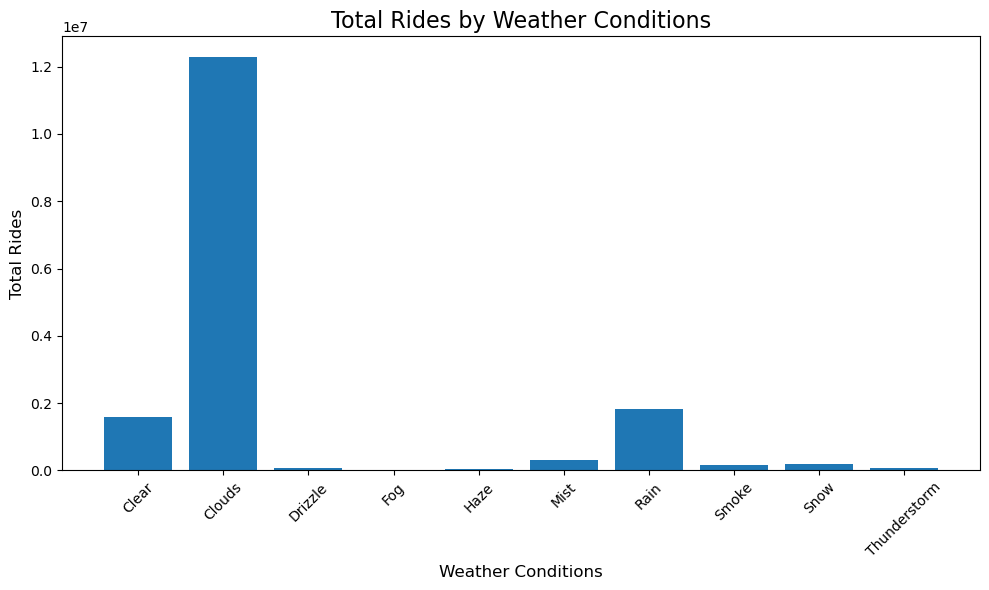

In [26]:

weather_rides = merged_data.groupby('weather_main').size().reset_index(name='total_rides')

# Calculate probabilities
weather_rides['ride_probability'] = weather_rides['total_rides'] / weather_rides['total_rides'].sum()

# Bar chart for total rides
plt.figure(figsize=(10, 6))
plt.bar(weather_rides['weather_main'], weather_rides['total_rides'])
plt.title('Total Rides by Weather Conditions', fontsize=16)
plt.xlabel('Weather Conditions', fontsize=12)
plt.ylabel('Total Rides', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:
merged_data["trip_length"] = merged_data["ended_time_in_hours"]-merged_data["started_time_in_hours"]

# Clean data: Drop NaNs in relevant columns
merged_data = merged_data.dropna(subset=['weather_main', 'trip_length'])

# Ensure trip_length is numeric
merged_data['trip_length'] = pd.to_numeric(merged_data['trip_length'], errors='coerce')

# Plotting a box plot
plt.figure(figsize=(12, 6))
merged_data.boxplot(column='trip_length', by='weather_main', grid=False, patch_artist=True, showfliers=False)

# Customize the plot
plt.title('Trip Duration by Weather Conditions', fontsize=16)
plt.suptitle('')  # Removes default Pandas boxplot title
plt.xlabel('Weather Conditions', fontsize=12)
plt.ylabel('Trip Duration (minutes)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


MemoryError: Unable to allocate 2.22 GiB for an array with shape (18, 16536398) and data type float64

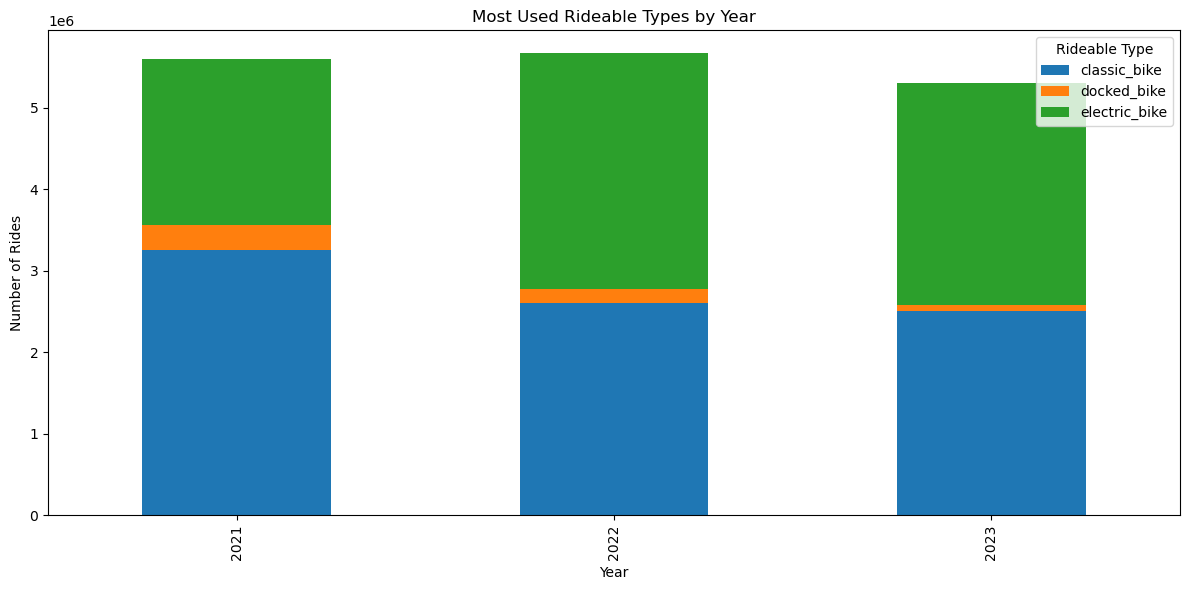

In [ ]:


# Convert started_at to datetime 
combined_df['started_at'] = pd.to_datetime(combined_df['started_at'])

# Extract the year
combined_df['year'] = combined_df['started_at'].dt.year

# Group by year and rideable type
rideable_counts = combined_df.groupby(['year', 'rideable_type']).size().reset_index(name='count')

# Pivot the data for better visualization
rideable_pivot = rideable_counts.pivot(index='year', columns='rideable_type', values='count')

# Plot the data
rideable_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Most Used Rideable Types by Year')
plt.xlabel('Year')
plt.ylabel('Number of Rides')
plt.legend(title='Rideable Type')
plt.tight_layout()
plt.show()
